In [1]:
library("ggalluvial")

Loading required package: ggplot2



In [2]:
predict <- read.table("/root/workspace/sjh/data/paper/label_transferred.csv")
ground_truth <- read.table("/root/workspace/sjh/data/paper/label_gt.csv",)
data <- cbind(predict, ground_truth)

In [3]:
colnames(data) <- c("predict", "ground_truth")
sapply(names(data), function(x) length(unique(data[,x])))

predict ground_truth 
          11           11

In [4]:
lodes <- to_lodes_form(data[,1:ncol(data)], axes = 1:ncol(data), id = "Cohort")
print(dim(lodes))
print(tail(lodes))

[1] 59402     3
      Cohort            x stratum
59397  29696 ground_truth     ILC
59398  29697 ground_truth    Mono
59399  29698 ground_truth     pDC
59400  29699 ground_truth     ILC
59401  29700 ground_truth       T
59402  29701 ground_truth       T


In [5]:
custom_colors <- c("B" = '#8dd3c7', "ILC" = '#ffffb3', "Mono" = '#bebada',"T" = '#fb8072',
                   "dc" = '#80b1d3',"macrophage" = '#fdb462', "mast_cell" = '#b3de69',
                   "non_immune" = '#fccde5', "pDC" = '#d9d9d9', "plasma" = '#bc80bd', "progenitor" = '#ccebc5')

In [14]:
options(repr.plot.width = 10, repr.plot.height = 3)

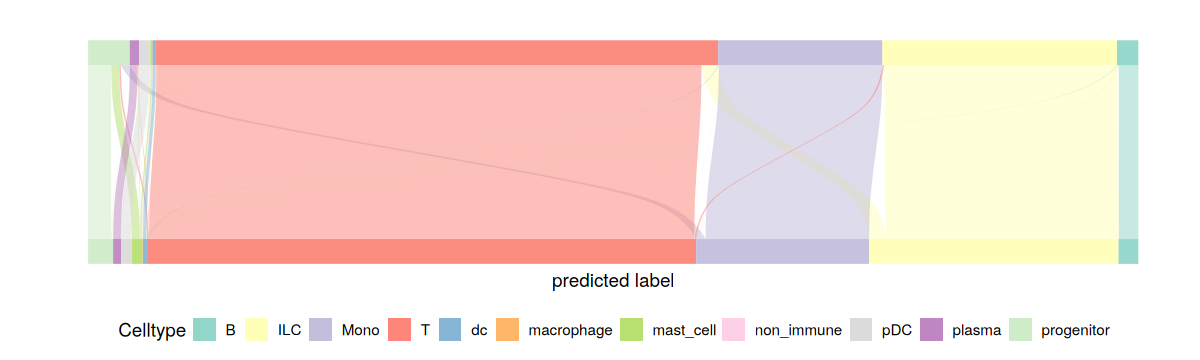

In [15]:
p <- ggplot(lodes, aes(x = x, stratum = stratum, alluvium = Cohort, fill = stratum, label = stratum)) +
        scale_x_discrete(expand = c(0, 0)) +
        geom_flow(width = 1/8) +
        geom_stratum(alpha = .9, width = 1/8, color = NA) +
        scale_fill_manual(values = custom_colors) +
        xlab("") + ylab("predicted label") + 
        theme_bw() +
        theme(panel.grid = element_blank()) + 
        theme(panel.border = element_blank()) +
        theme(axis.line = element_blank(), axis.ticks = element_blank(), axis.text = element_blank()) +
        ggtitle("") +
        guides(fill = guide_legend(nrow = 1, byrow = TRUE, title = "Celltype", keywidth = 1, keyheight = 1)) +
        theme(legend.position = "bottom", legend.direction = "horizontal", legend.justification = "center") +
        coord_flip() 
p

In [8]:
# ggsave("figure3.svg", p, dpi = 300, width = 10, height = 3)